# SVM Regressor

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
from setting_features import *

In [4]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

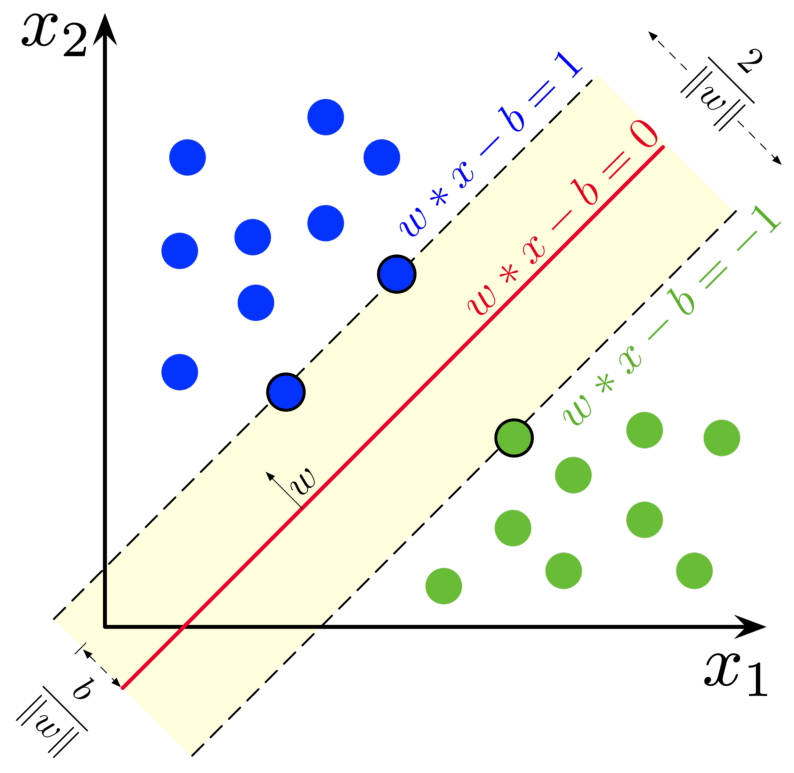

In [5]:
display_img('SVM.png', 10, 10)

**Function to optimize**

min $ \left( \frac{\gamma}{2} \cdot ||w||^2 + C \cdot \sum_{i=1}^n \epsilon_i^2 \right) $

In [6]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [7]:
df = pd.read_csv('Life Expectancy Data.csv')

In [8]:
X_cols = var_dict['cat_oh'] + var_dict['num_mean']
y_col = ['Life expectancy ']

### ii. Drop 'y' NaNs

In [9]:
df = df[df[y_col[0]].notna()]

### iii. Split

In [10]:
# External

ctr_test_hor_ext = ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Peru', 'Uruguay']

ctr_test_ver_ext = ['Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Venezuela (Bolivarian Republic of)']

# Internal

ctr_test_hor_int = ['Dominica', 'Mauritius', 'Netherlands', 'Armenia', 'Kazakhstan', 'Russian Federation', 'Ukraine', 'Bangladesh', 'India', 'Somalia']

ctr_test_ver_int = ['Afghanistan', 'New Zealand', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines']

# Validation

ctr_val_hor = ['Albania', 'Qatar', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Poland', 'Portugal', 'Republic of Korea', 'Senegal', 'Republic of Moldova', 
               'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Morocco', 'Montenegro']

ctr_val_ver = ['Algeria', 'Luxembourg', 'Sierra Leone', 'Seychelles', 'Serbia', 'Saudi Arabia', 'Mongolia', 'Micronesia (Federated States of)', 'Mexico',
               'Mauritania', 'Malta', 'Mali', 'Maldives', 'Malaysia', 'Malawi', 'Madagascar', 'Lithuania', 'Slovakia', 'Libya', 'Liberia']

# All validation and test countries

all_ctr = ctr_test_hor_ext + ctr_test_ver_ext + ctr_test_hor_int + ctr_test_ver_int + ctr_val_hor + ctr_val_ver 

In [11]:
# External

df_test_hor_ext = df[(df['Country'].isin(ctr_test_hor_ext)) & (df['Year'] != 2015)]
df_test_ver_ext = df[(df['Country'].isin(ctr_test_ver_ext)) & (df['Year'] == 2015)]

# Internal

df_test_hor_int = df[(df['Country'].isin(ctr_test_hor_int)) & (df['Year'] != 2015)]
df_test_ver_int = df[(df['Country'].isin(ctr_test_ver_int)) & (df['Year'] == 2015)]

# Validation

df_val_hor = df[(df['Country'].isin(ctr_val_hor)) & (df['Year'] != 2015) & (df['Year'] != 2014)]
df_val_ver = df[(df['Country'].isin(ctr_val_ver)) & (df['Year'] == 2014)]

# Train

df_train = df[(~df['Country'].isin(all_ctr)) & (df['Year'] != 2015) & (df['Year'] != 2014)]

In [12]:
# External

X_test_hor_ext = df_test_hor_ext[X_cols]
y_test_hor_ext = df_test_hor_ext[y_col]

X_test_ver_ext = df_test_ver_ext[X_cols]
y_test_ver_ext = df_test_ver_ext[y_col]

# Internal

X_test_hor_int = df_test_hor_int[X_cols]
y_test_hor_int = df_test_hor_int[y_col]

X_test_ver_int = df_test_ver_int[X_cols]
y_test_ver_int = df_test_ver_int[y_col]

# Validation

X_val_hor = df_val_hor[X_cols]
y_val_hor = df_val_hor[y_col]

X_val_ver = df_val_ver[X_cols]
y_val_ver = df_val_ver[y_col]

# Train

X_train = df_train[X_cols]
y_train = df_train[y_col]

### iv. Fit preprocess

In [13]:
from preprocessing import *

In [14]:
transformers_fit = get_fit_transformers(var_dict, X_train)

In [15]:
# Train

y_train = y_train.reset_index()
y_train = y_train.drop(columns = ['index'])

# Validation

y_val_hor = y_val_hor.reset_index()
y_val_hor = y_val_hor.drop(columns = ['index'])

y_val_ver = y_val_ver.reset_index()
y_val_ver = y_val_ver.drop(columns = ['index'])

# Test

y_test_hor_int = y_test_hor_int.reset_index()
y_test_hor_int = y_test_hor_int.drop(columns = ['index'])

y_test_ver_int = y_test_ver_int.reset_index()
y_test_ver_int = y_test_ver_int.drop(columns = ['index'])

y_test_hor_ext = y_test_hor_ext.reset_index()
y_test_hor_ext = y_test_hor_ext.drop(columns = ['index'])

y_test_ver_ext = y_test_ver_ext.reset_index()
y_test_ver_ext = y_test_ver_ext.drop(columns = ['index'])

In [16]:
# Train

X_train = transform_datasets(transformers_fit, var_dict, X_train)

# Validation

X_val_hor = transform_datasets(transformers_fit, var_dict, X_val_hor)

X_val_ver = transform_datasets(transformers_fit, var_dict, X_val_ver)

# Test

X_test_hor_int = transform_datasets(transformers_fit, var_dict, X_test_hor_int)

X_test_ver_int = transform_datasets(transformers_fit, var_dict, X_test_ver_int)

X_test_hor_ext = transform_datasets(transformers_fit, var_dict, X_test_hor_ext)

X_test_ver_ext = transform_datasets(transformers_fit, var_dict, X_test_ver_ext)

### v. Train model (with Fine Tunning)

In [17]:
from sklearn.svm import SVR

In [18]:
N_C = 10
h_C = 1

N_G = 10
h_G = 0.01

In [19]:
all_C = [i*h_C for i in range(1, N_C + 1)]
all_G = [i*h_G for i in range(1, N_G + 1)]

In [20]:
all_mape_train = []
all_mape_val = []
all_params = []


for C_part in all_C:

    print('C: ', C_part)

    for G_part in all_G:

        reg = SVR(C = C_part, gamma = G_part, kernel = 'linear')

        reg = reg.fit(X_train, y_train)

        y_train_pred = reg.predict(X_train)
        y_val_hor_pred = reg.predict(X_val_hor)
        y_val_ver_pred = reg.predict(X_val_ver)

        mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)
        mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)
        mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)
        mape_val = (mape_val_hor + mape_val_ver)/2

        all_mape_train.append(mape_train)
        all_mape_val.append(mape_val)
        all_params.append([C_part, G_part])
    
    print('-'*70)

all_mape_train = np.array(all_mape_train)
all_mape_val = np.array(all_mape_val)
all_params = np.array(all_params)

C:  1
----------------------------------------------------------------------
C:  2
----------------------------------------------------------------------
C:  3
----------------------------------------------------------------------
C:  4
----------------------------------------------------------------------
C:  5
----------------------------------------------------------------------
C:  6
----------------------------------------------------------------------
C:  7
----------------------------------------------------------------------
C:  8
----------------------------------------------------------------------
C:  9
----------------------------------------------------------------------
C:  10
----------------------------------------------------------------------


In [21]:
mape_train_opt = all_mape_train[all_mape_val == all_mape_val.min()][0]
mape_val_opt = all_mape_val[all_mape_val == all_mape_val.min()][0]
C_opt, G_opt = all_params[all_mape_val == all_mape_val.min()][0]

In [22]:
print('Train MAPE:', mape_train_opt)
print('Val MAPE:', mape_val_opt)
print('C opt:', C_opt)
print('G opt:', G_opt)

Train MAPE: 5.1
Val MAPE: 4.385
C opt: 1.0
G opt: 0.01


### vi. Train definitive model

In [23]:
reg = SVR(C = C_opt, gamma = G_opt, kernel = 'linear')

In [24]:
reg = reg.fit(X_train, y_train)

### vii. Report of metrics

In [25]:
# Train

y_train_pred = reg.predict(X_train)
mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)

# Validation

y_val_hor_pred = reg.predict(X_val_hor)
mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)

y_val_ver_pred = reg.predict(X_val_ver)
mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)

# Test 

y_test_hor_int_pred = reg.predict(X_test_hor_int)
mape_test_hor_int = round(abs((y_test_hor_int_pred - y_test_hor_int['Life expectancy '])/y_test_hor_int['Life expectancy ']).mean()*100, 2)

y_test_ver_int_pred = reg.predict(X_test_ver_int)
mape_test_ver_int = round(abs((y_test_ver_int_pred - y_test_ver_int['Life expectancy '])/y_test_ver_int['Life expectancy ']).mean()*100, 2)

y_test_hor_ext_pred = reg.predict(X_test_hor_ext)
mape_test_hor_ext = round(abs((y_test_hor_ext_pred - y_test_hor_ext['Life expectancy '])/y_test_hor_ext['Life expectancy ']).mean()*100, 2)

y_test_ver_ext_pred = reg.predict(X_test_ver_ext)
mape_test_ver_ext = round(abs((y_test_ver_ext_pred - y_test_ver_ext['Life expectancy '])/y_test_ver_ext['Life expectancy ']).mean()*100, 2)

In [26]:
print('Train')

print('\n')

print('MAPE Train:', mape_train)

print('\n')

print('-'*70)

print('Validation')

print('\n')

print('MAPE Val Hor:', mape_val_hor)
print('MAPE Val Ver:', mape_val_ver)

print('\n')

print('-'*70)

print('Test')

print('\n')

print('MAPE Test Hor Int:', mape_test_hor_int)
print('MAPE Test Ver Int:', mape_test_ver_int)
print('MAPE Test Hor Ext:', mape_test_hor_ext)
print('MAPE Test Ver Ext:', mape_test_ver_ext)

print('\n')

print('-'*70)

Train


MAPE Train: 5.1


----------------------------------------------------------------------
Validation


MAPE Val Hor: 4.63
MAPE Val Ver: 4.14


----------------------------------------------------------------------
Test


MAPE Test Hor Int: 11.25
MAPE Test Ver Int: 6.58
MAPE Test Hor Ext: 2.84
MAPE Test Ver Ext: 4.1


----------------------------------------------------------------------


### viii. Patterns

In [27]:
X_test_hor_int['pred'] = y_test_hor_int
X_test_ver_int['pred'] = y_test_ver_int
X_test_hor_ext['pred'] = y_test_hor_ext
X_test_ver_ext['pred'] = y_test_ver_ext

In [28]:
df_patt = pd.concat([X_test_hor_int, X_test_ver_int, X_test_hor_ext, X_test_ver_ext], axis = 0)
df_patt = df_patt.reset_index()
df_patt = df_patt.drop(columns = ['index'])

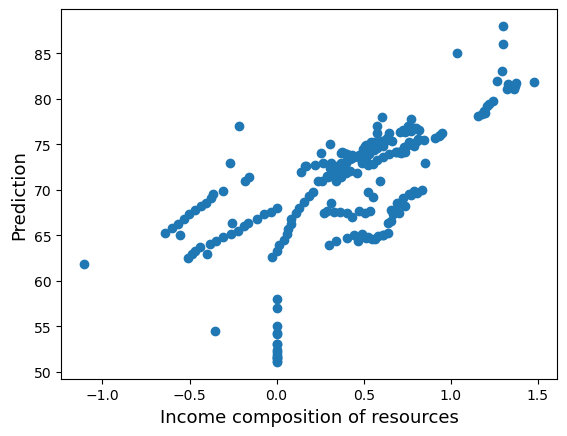

In [29]:
plt.scatter(df_patt['Income composition of resources'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Income composition of resources', fontsize = 13)
plt.show()

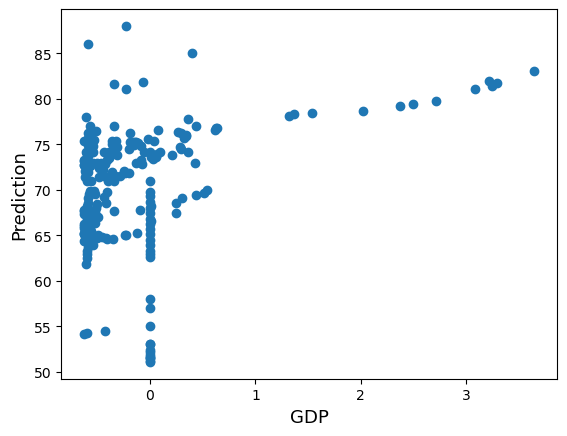

In [30]:
plt.scatter(df_patt['GDP'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('GDP', fontsize = 13)
plt.show()

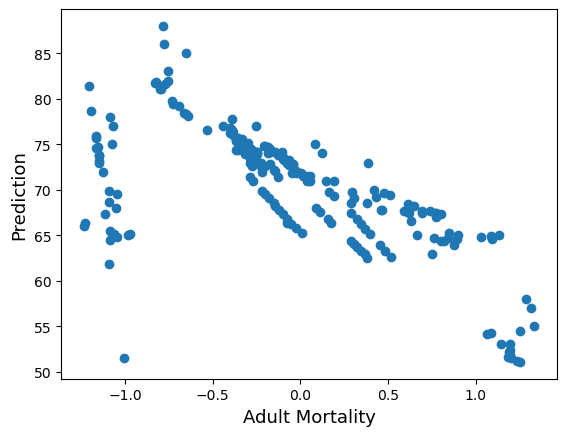

In [31]:
plt.scatter(df_patt['Adult Mortality'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Adult Mortality', fontsize = 13)
plt.show()

### ix. Feature importance

In [32]:
fi = pd.DataFrame(zip(X_train.columns, (abs(reg.coef_)/abs(reg.coef_).sum())[0]))
fi = fi.rename(columns = {0: 'Variable', 1: 'Importance'})
fi['Importance'] = fi['Importance']*100

fi = fi.sort_values(by = ['Importance'], ascending = False)
fi = fi.reset_index()
fi = fi.drop(columns = ['index'])

In [33]:
fi

,Variable,Importance
0,Adult Mortality,20.031782
1,Income composition of resources,18.836523
2,HIV/AIDS,14.797843
3,Status_Developed,9.118582
4,under-five deaths,8.840753
5,Diphtheria,8.752849
6,BMI,3.445303
7,Total expenditure,3.230063
8,Hepatitis B,3.161134
9,thinness 5-9 years,2.783053


### x. Explainability

In [34]:
import shap

In [35]:
df_patt = df_patt.sample(100)

In [36]:
explainer = shap.KernelExplainer(reg.predict, df_patt[X_train.columns])

In [37]:
shap_values = explainer.shap_values(df_patt[X_train.columns])

  0%|          | 0/100 [00:00<?, ?it/s]

In [38]:
df_shap_values = pd.DataFrame(shap_values)
df_shap_values.columns = X_train.columns

**Importance Variable**

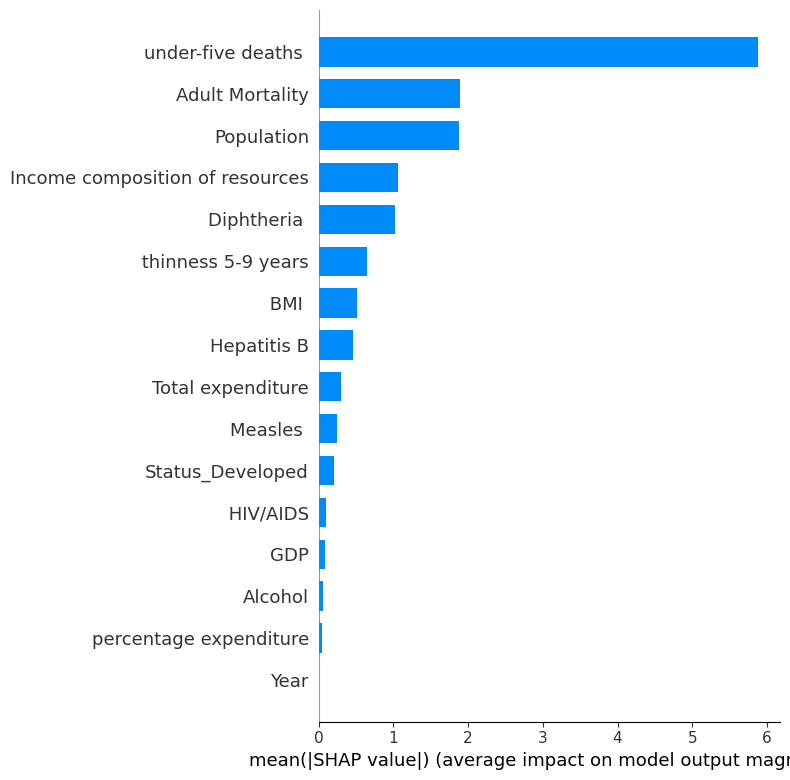

In [39]:
shap.summary_plot(shap_values, df_patt[X_train.columns], plot_type = "bar")

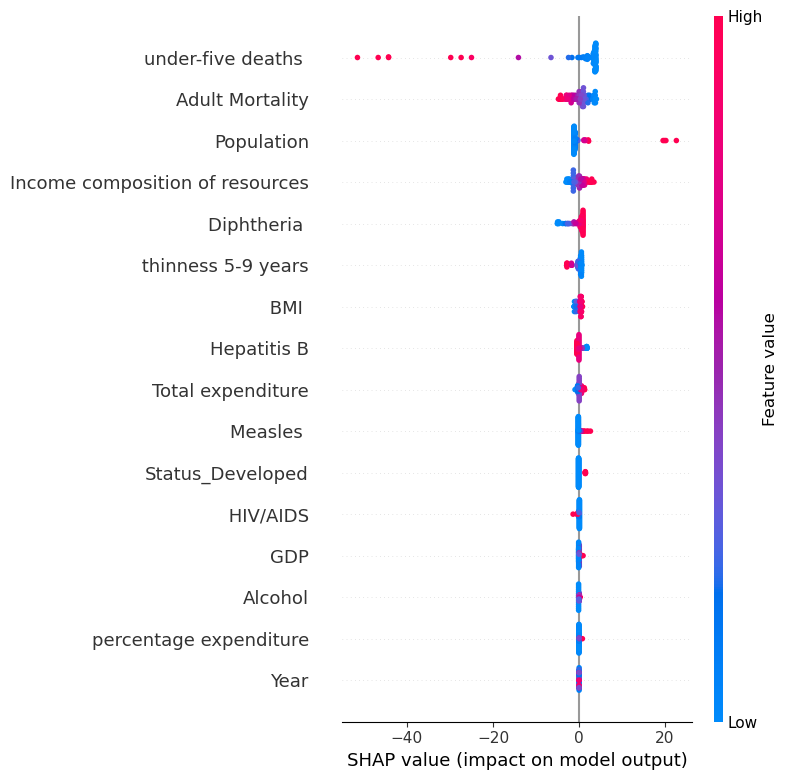

In [40]:
shap.summary_plot(shap_values, df_patt[X_train.columns])

In [41]:
df_shap_values['partial_sum_SHAP'] = df_shap_values.sum(axis = 1)

In [42]:
df_shap_values = df_shap_values[['partial_sum_SHAP']]

In [43]:
df_shap_values['pred_model'] = df_patt['pred']

**Sum of SHAP Values**

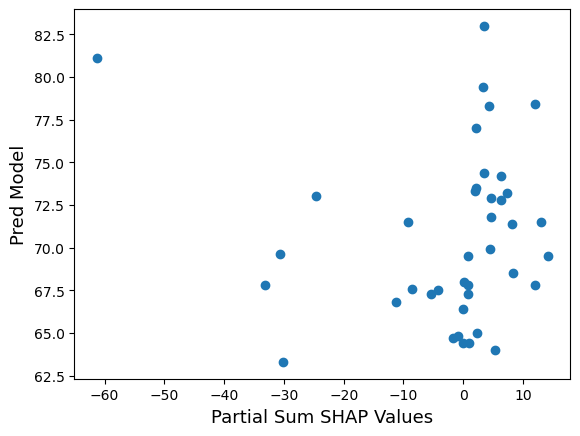

In [44]:
plt.scatter(df_shap_values['partial_sum_SHAP'], df_shap_values['pred_model'])
plt.xlabel('Partial Sum SHAP Values', fontsize = 13)
plt.ylabel('Pred Model', fontsize = 13)
plt.show()

**SHAP dependency**

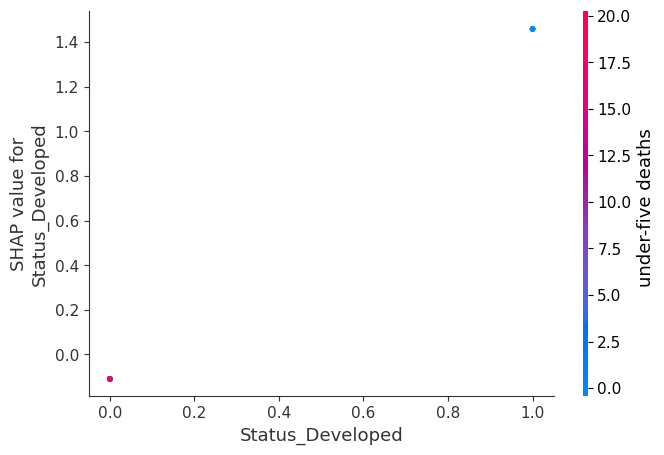

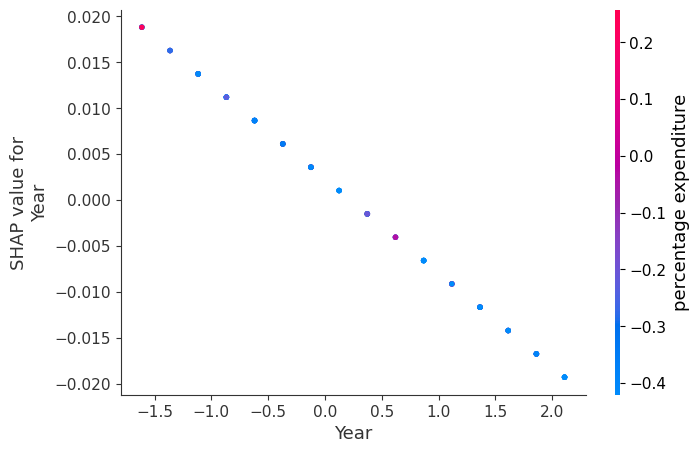

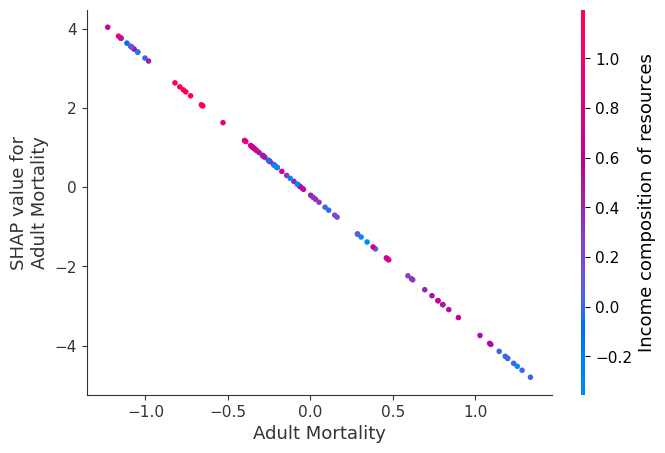

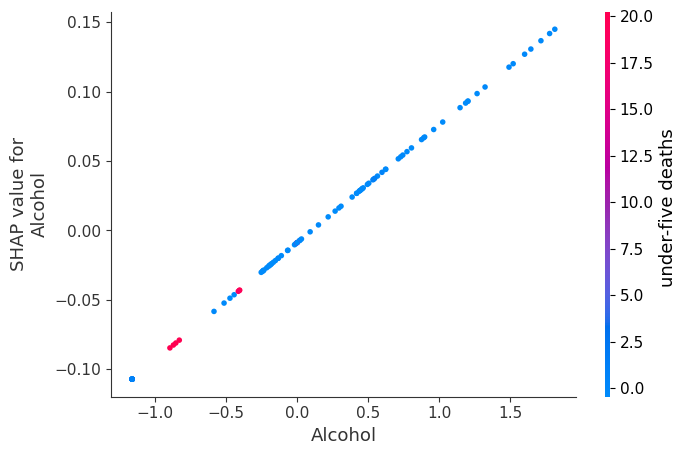

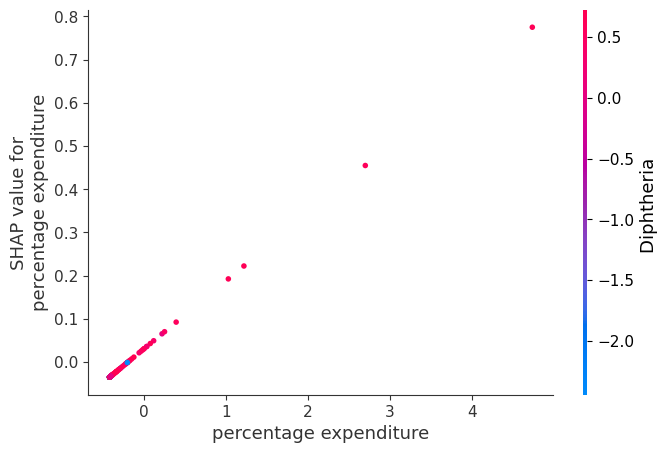

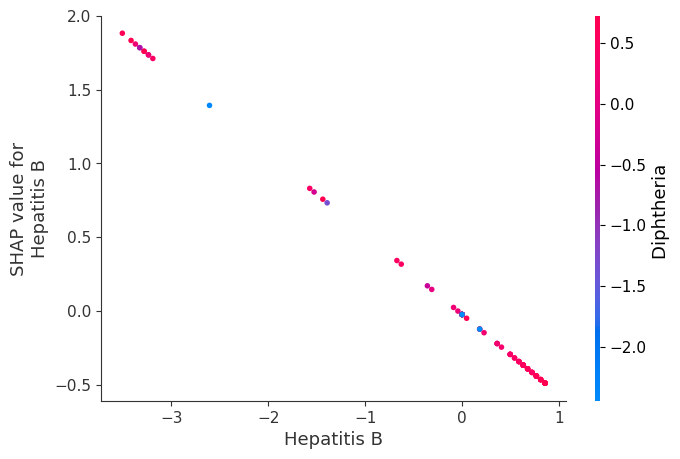

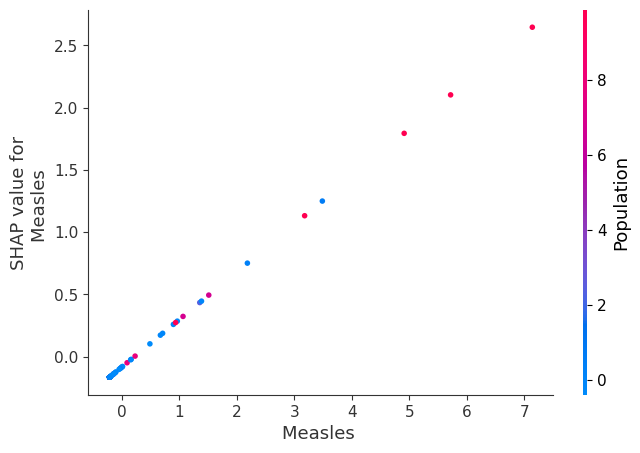

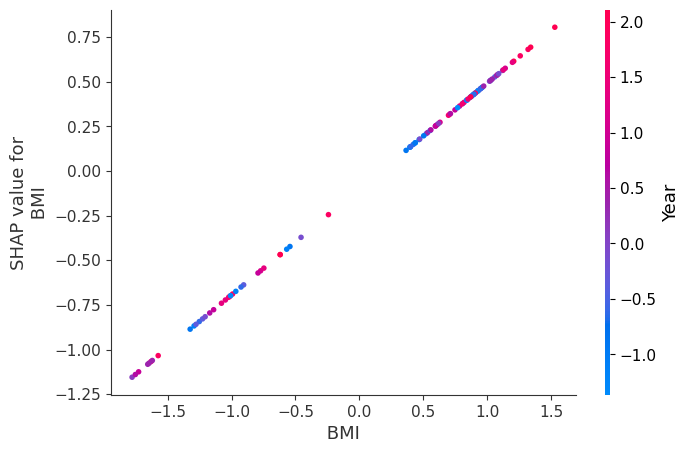

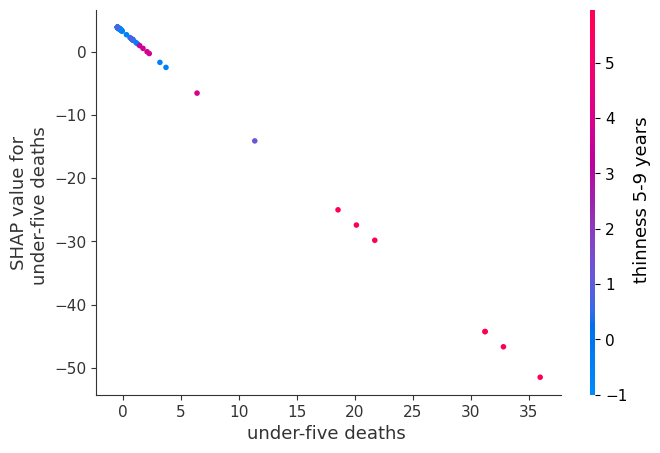

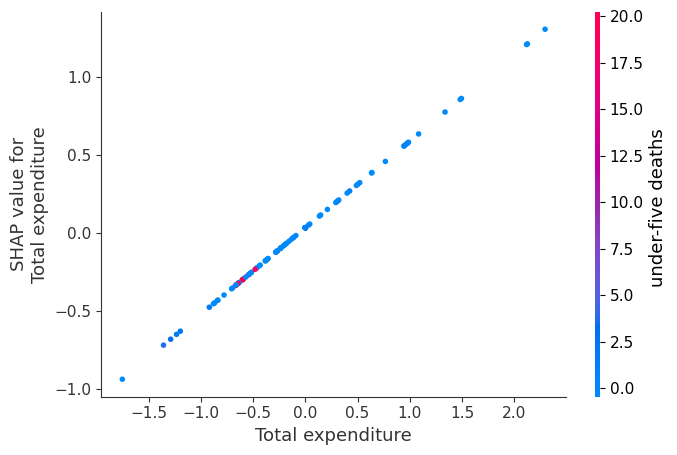

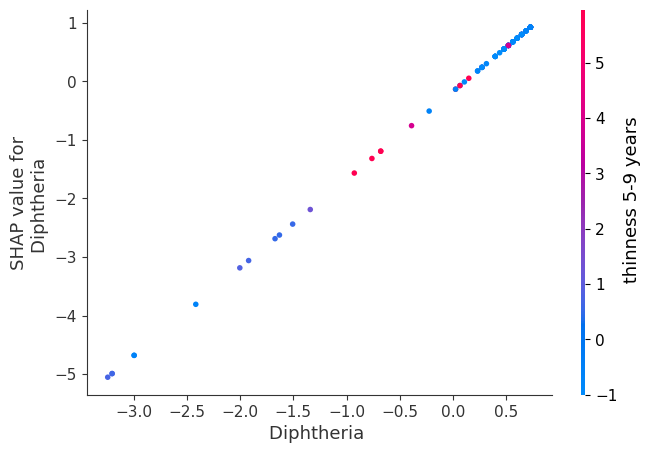

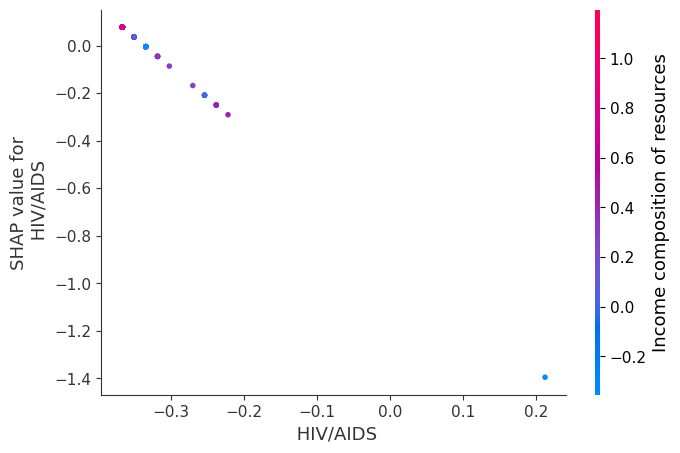

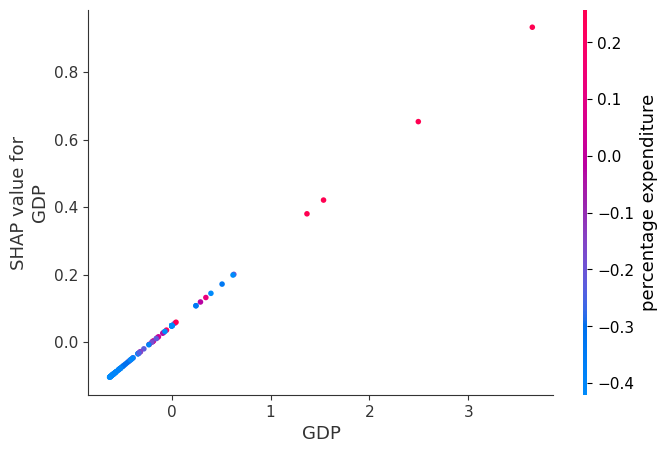

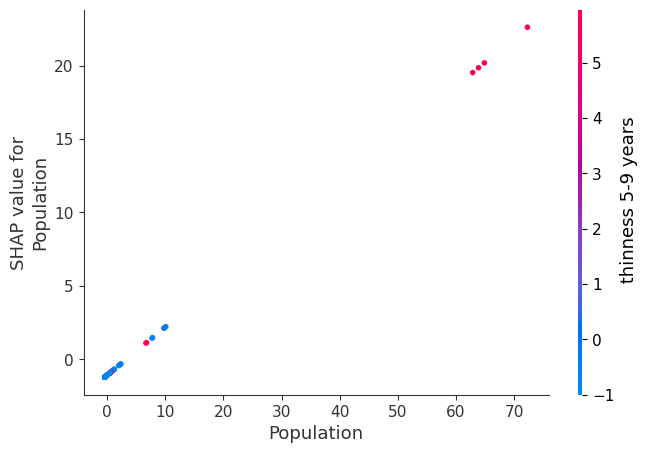

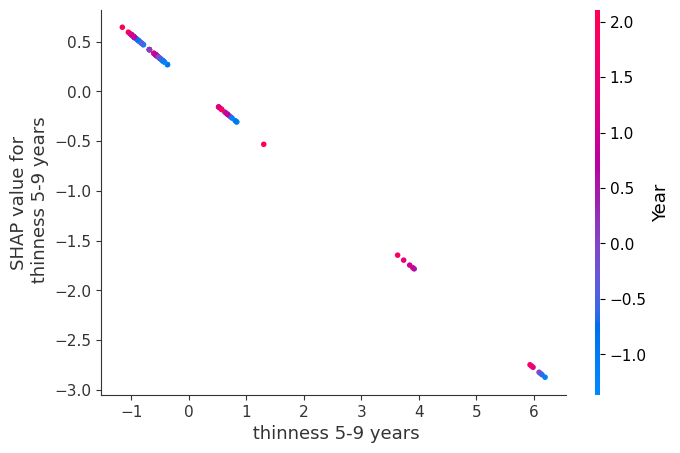

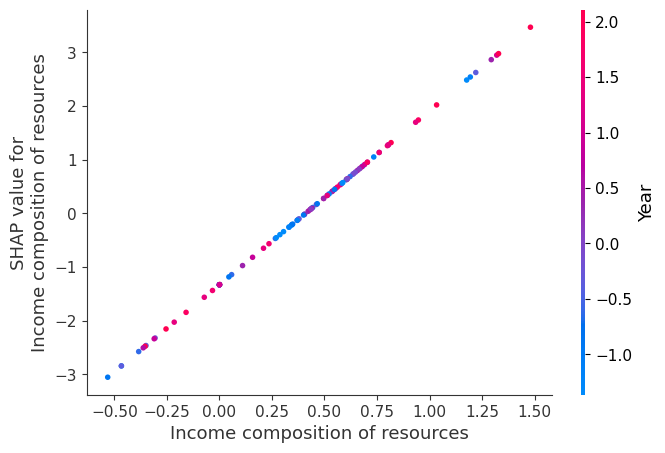

In [45]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, df_patt[X_train.columns])

### Time of execution

In [46]:
end = time.time()

In [47]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 20 minutes and 0 seconds.
